# A simple illustration of Donor Fatigue from the 2016 US Presidential election


First up, we load our neccesary packages.

In [10]:

library(gridExtra)
library(ggplot2)
library(tidyr)
library(dplyr)
library(zoo)

Then we properly format the data, getting rid of all 120 Republican candidates and just focus on the three major ones. We also get rid of any contribution reimbursements, so we have only positive contributions. Lastly, we sort the data by month. 

This analysis will focus on Georgia

In [11]:
df= read.csv("C:/Users/malte/OneDrive/Coding/Lessons/Intro to r/Final Project/P00000001-GA.csv",sep=",")
dft=subset(df,df$cand_nm=="Sanders, Bernard"|df$cand_nm=="Clinton, Hillary Rodham"|df$cand_nm=="Trump, Donald J.")
dft=subset(dft,dft$contb_receipt_amt>0)
dft$contb_receipt_dt =  as.Date(dft$contb_receipt_dt, format="%m/%d/%Y")
dft=filter(dft,dft$contb_receipt_dt<as.Date("11/09/2016",format="%m/%d/%Y"))
dft$year_month= format(as.Date(dft$contb_receipt_dt,format="%m/%d/%Y"),"%Y-%m")
dft$year_month=as.yearmon(dft$year_month)

Now we get an overall picture of the donations to the three main candidates. 

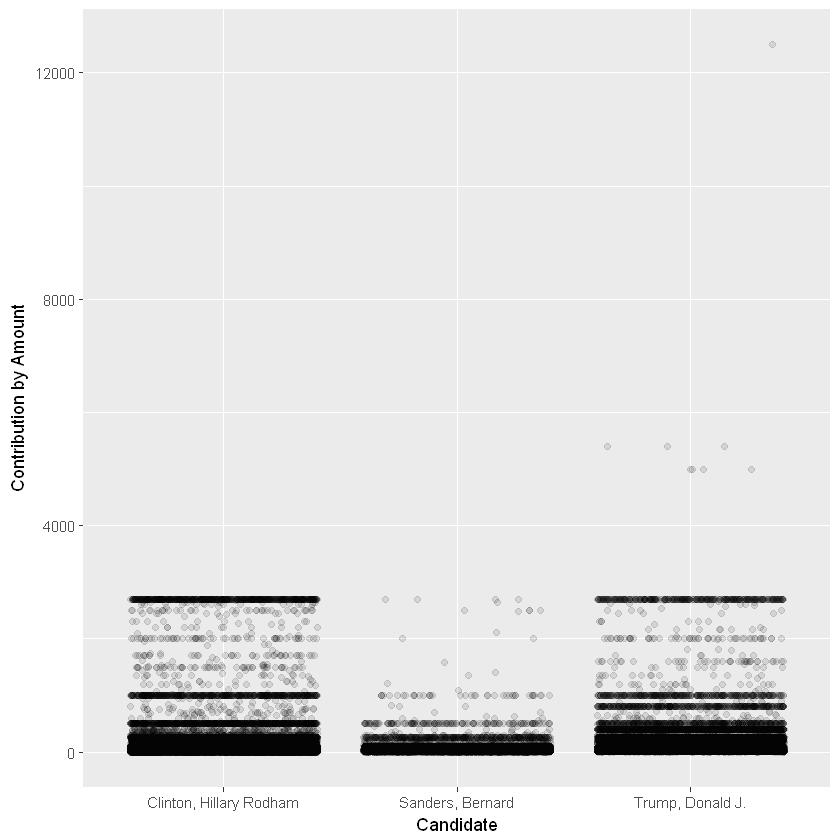

In [12]:
ggplot(aes(cand_nm,contb_receipt_amt),data=subset(dft,dft$contb_receipt_amt>0))+
  geom_jitter(alpha=1/10)+
  labs(x="Candidate",y="Contribution by Amount")

Smaller donations are frequent in all campaigns, but the Trump camapaign had more concentrated bigger donations. 

Let's investigate donations by month.

Don't know how to automatically pick scale for object of type yearmon. Defaulting to continuous.
Don't know how to automatically pick scale for object of type yearmon. Defaulting to continuous.
Don't know how to automatically pick scale for object of type yearmon. Defaulting to continuous.
Don't know how to automatically pick scale for object of type yearmon. Defaulting to continuous.
Don't know how to automatically pick scale for object of type yearmon. Defaulting to continuous.


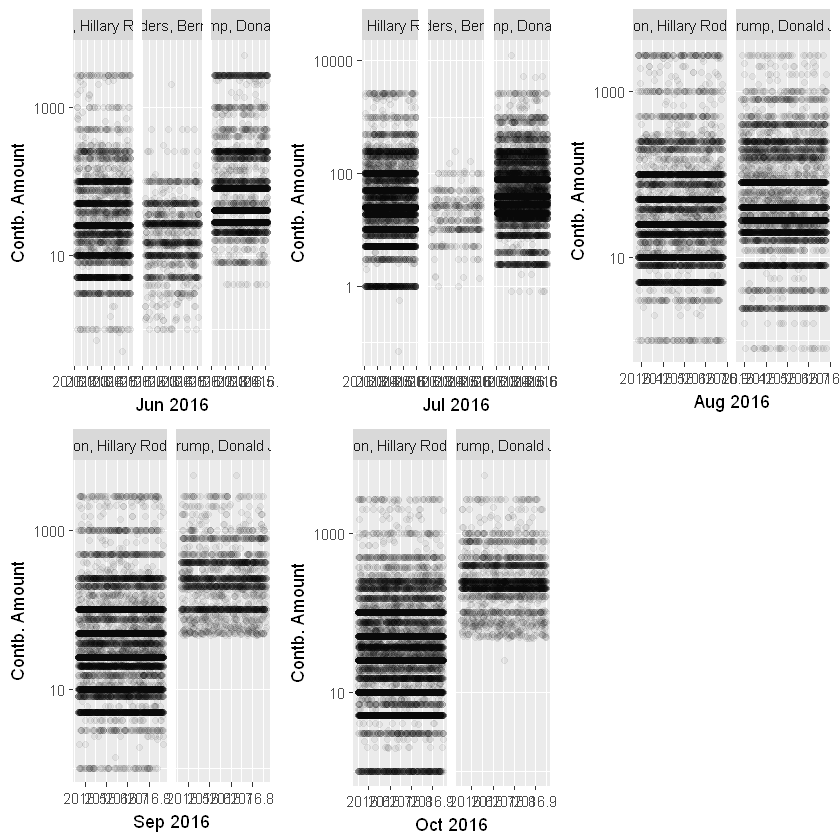

In [13]:
t=seq(as.Date("2015/4/1"), by="month", length.out=21)
t=format(as.Date(t,format="%m/%d/%Y"),"%m/%Y")


p1=ggplot(aes(year_month,contb_receipt_amt),data=subset(dft,dft$year_month=="Jun 2016"))+
  scale_y_log10()+
  facet_wrap(~cand_nm)+
  geom_point(alpha=1/20,position = position_jitter(w=0.2,h=0))+
  labs(x="Jun 2016",y="Contb. Amount")
p2=ggplot(aes(year_month,contb_receipt_amt),data=subset(dft,dft$year_month=="Jul 2016"))+
  scale_y_log10()+
  facet_wrap(~cand_nm)+
  geom_point(alpha=1/20,position = position_jitter(w=0.2,h=0))+
  labs(x="Jul 2016",y="Contb. Amount")
p3=ggplot(aes(year_month,contb_receipt_amt),data=subset(dft,dft$year_month=="Aug 2016"))+
  scale_y_log10()+
  facet_wrap(~cand_nm)+
  geom_point(alpha=1/20,position = position_jitter(w=0.2,h=0))+
  labs(x="Aug 2016",y="Contb. Amount")
p4=ggplot(aes(year_month,contb_receipt_amt),data=subset(dft,dft$year_month=="Sep 2016"))+
  scale_y_log10()+
  facet_wrap(~cand_nm)+
  geom_point(alpha=1/20,position = position_jitter(w=0.2,h=0))+
  labs(x="Sep 2016",y="Contb. Amount")
p5=ggplot(aes(year_month,contb_receipt_amt),data=subset(dft,dft$year_month=="Oct 2016"))+
  scale_y_log10()+
  facet_wrap(~cand_nm)+
  geom_point(alpha=1/20,position = position_jitter(w=0.2,h=0))+
  labs(x="Oct 2016",y="Contb. Amount")

grid.arrange(p1,p2,p3,p4,p5,ncol=3)

Couple of things are instantly obvious from these graphs:

- Bernie Sanders doantions were neglectable later in the race
- Donald Trump attracted higher contributions
- There seems to be a slump in donations towards Hilary

-> Let's investigate the last point further 

Don't know how to automatically pick scale for object of type yearmon. Defaulting to continuous.


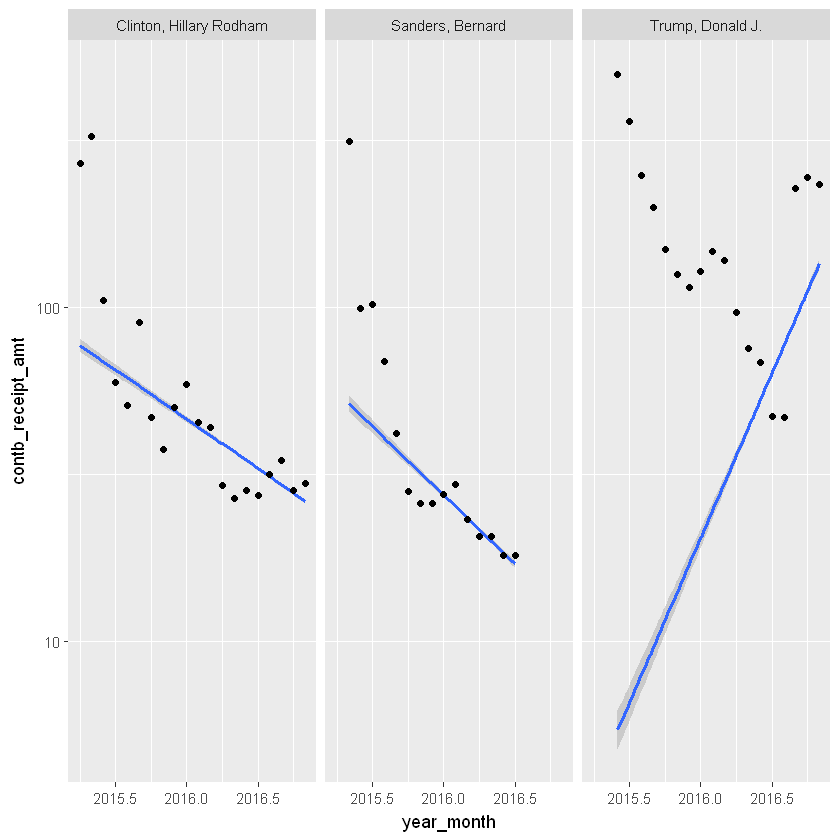

In [14]:
ggplot(aes(year_month,contb_receipt_amt),data=dft)+
  facet_wrap(~cand_nm)+
  scale_y_log10()+
  geom_smooth(method="lm")+
  geom_point(stat="summary",fun.y=mean)

It seems obvious that there was some sort of donor fatigue in the Clinton (& Sanders) campaign. The linear regression model holds up pretty well for her, whereas Trum experienced a late campaing surge. 

Let's investigate the correlation between date and contribution amount. 

In [16]:
print("The overall correlation between date and contribution")
lm(contb_receipt_amt~year_month,data=dft)
print("... for Clinton")
lm(contb_receipt_amt~year_month,data=filter(dft,dft$cand_nm=="Clinton, Hillary Rodham"))

[1] "The overall correlation between date and contribution"



Call:
lm(formula = contb_receipt_amt ~ year_month, data = dft)

Coefficients:
(Intercept)   year_month  
  102019.29       -50.54  


[1] "... for Clinton"



Call:
lm(formula = contb_receipt_amt ~ year_month, data = filter(dft, 
    dft$cand_nm == "Clinton, Hillary Rodham"))

Coefficients:
(Intercept)   year_month  
   428514.6       -212.4  


The correlation between date and contrib. amount is much higher for Clinton than overall, thus proving that there was real donor fatigue in Georgia. This state is emblematic of several states that were thought within reach of the Democrats in 2016 at first, but ultimately went red. 